In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
pd.set_option('display.max_rows', None)

In [ ]:
seeds_train = pd.read_csv("seeds_train.csv") 
seeds_test = pd.read_csv("seeds_test.csv")

In [ ]:
x_seeds_train = seeds_train.iloc[57:, :-1].to_numpy()
y_seeds_train = seeds_train.iloc[57:, -1]

In [ ]:
df_filtered = seeds_test[seeds_test['1'] !=1]


In [ ]:
x_seeds_test = df_filtered.iloc[:,:-1].to_numpy()
y_seeds_test = df_filtered.iloc[:, -1]

Accuracy for model_SVM:  100.0

Classification Report_SVM:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Confusion Matrix_SVM:

[[17  0]
 [ 0 12]]


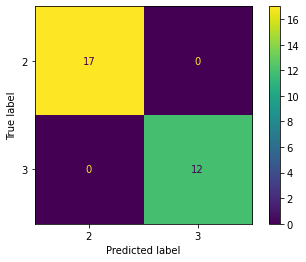

In [ ]:
# ----------------------------------- SVM for train data --------------------------------
clf= SVC(kernel = 'linear', random_state = 0)
clf.fit(x_seeds_train,y_seeds_train)
# Predicting the Test set results
y_pred=clf.predict(x_seeds_test)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_SVM: ",clf.score(x_seeds_test, y_seeds_test)*100)
print('\nClassification Report_SVM:\n')
print(classification_report(y_seeds_test, y_pred))
print('Confusion Matrix_SVM:\n')
print(confusion_matrix(y_seeds_test, y_pred))
plot_confusion_matrix(clf, x_seeds_test, y_seeds_test)

Accuracy for model_Perceptron:  100.0

Classification Report_Perceptron:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Confusion Matrix_Perceptron:

[[17  0]
 [ 0 12]]


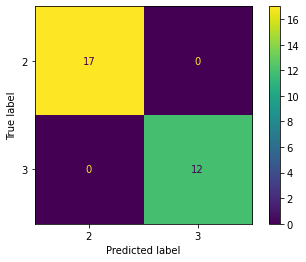

In [ ]:
# ----------------------------------- Perceptron for train data --------------------------------
clf = Perceptron(n_iter_no_change=80)
clf.fit(x_seeds_train,y_seeds_train)
y_pred=clf.predict(x_seeds_test)
#print(y_pred)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_Perceptron: ",clf.score(x_seeds_test, y_seeds_test)*100)
print('\nClassification Report_Perceptron:\n')
print(classification_report(y_seeds_test, y_pred))
print('Confusion Matrix_Perceptron:\n')
print(confusion_matrix(y_seeds_test, y_pred))
plot_confusion_matrix(clf, x_seeds_test, y_seeds_test)

In [ ]:
x, y=seeds_train.iloc[:, :-1].to_numpy(), seeds_train.iloc[:, -1]
x_test, y_test = seeds_test.iloc[:,:-1].to_numpy() , seeds_test.iloc[:, -1]

def binarized_labels(labels,my_class):
    labels = np.copy(labels)
    for i in range(len(labels)):
        if labels[i] == my_class:
                labels[i]=1
        else: 
            labels[i]=-1
    return labels

In [ ]:
def decision_boundary(model,x,Labels_1,title,x_label,y_label):
    X_set, y_set = x,Labels_1
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.20, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [ ]:
def plot_point(X,predicted,Y,title):
    wrong_values_x=[]
    wrong_values_y=[]
    correct_values_x=[]
    correct_values_y=[]   
    for i in range(len(X)):
        if predicted[i] == Y[i]:
            correct_values_x.append(X[i][0])
            correct_values_y.append(X[i][1])
        else:
            wrong_values_x.append(X[i][0])
            wrong_values_y.append(X[i][1])
    plt.scatter(correct_values_x,correct_values_y,label='Correct points', marker='o', c='green')
    plt.scatter(wrong_values_x,wrong_values_y,label='Wrong points', marker='+', c='red')
    plt.title(title)
    plt.xlabel("first feature")
    plt.ylabel("fifth feature")
    plt.legend()
    plt.show()

Accuracy for model_SVM:  92.6829268292683

Classification Report_SVM:

              precision    recall  f1-score   support

          -1       0.93      0.97      0.95        29
           1       0.91      0.83      0.87        12

    accuracy                           0.93        41
   macro avg       0.92      0.90      0.91        41
weighted avg       0.93      0.93      0.93        41

Confusion MatrixSVM:



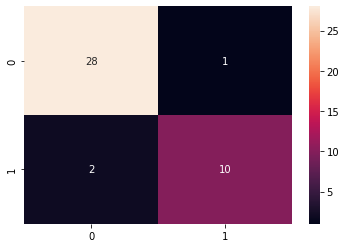

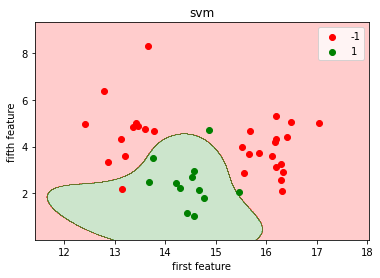

In [ ]:
#-------------------------------------------- SVM 1 ---------------------------------------------------
label_train_y=binarized_labels(y,1)
label_test_y=binarized_labels(y_test,1)
title='svm'
x_label="first feature"
y_label="fifth feature"
model_SVM_1= SVC(gamma='auto',probability=True)
model_SVM_1.fit(x,label_train_y)
# Predicting the Test set results
y_pred=model_SVM_1.predict(x_test)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_SVM: ",model_SVM_1.score(x_test, label_test_y)*100)
print('\nClassification Report_SVM:\n')
print(classification_report(label_test_y,y_pred))
print('Confusion MatrixSVM:\n')
hm=sn.heatmap(confusion_matrix(label_test_y,y_pred), annot=True)
plt.show()
decision_boundary(model_SVM_1,x_test,label_test_y,title,x_label,y_label)

Accuracy for model_SVM:  95.1219512195122

Classification Report_SVM:

              precision    recall  f1-score   support

          -1       1.00      0.92      0.96        24
           1       0.89      1.00      0.94        17

    accuracy                           0.95        41
   macro avg       0.95      0.96      0.95        41
weighted avg       0.96      0.95      0.95        41

Confusion Matrix_SVM:



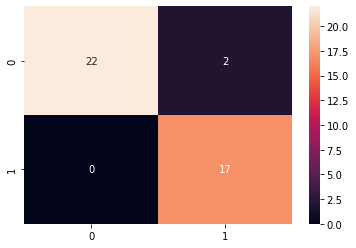

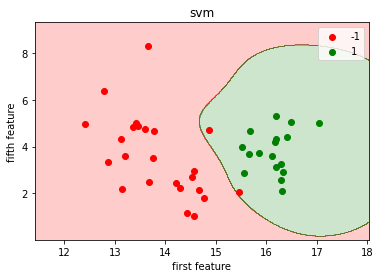

In [ ]:
#-------------------------------------------- SVM 2 ---------------------------------------------------
label_train_y=binarized_labels(y,2)
label_test_y=binarized_labels(y_test,2)
title='svm'
x_label="first feature"
y_label="fifth feature"
model_SVM_2= SVC(gamma='auto',probability=True)
model_SVM_2.fit(x,label_train_y)
# Predicting the Test set results
y_pred=model_SVM_2.predict(x_test)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_SVM: ",model_SVM_2.score(x_test, label_test_y)*100)
print('\nClassification Report_SVM:\n')
print(classification_report(label_test_y,y_pred))
print('Confusion Matrix_SVM:\n')
hm=sn.heatmap(confusion_matrix(label_test_y,y_pred), annot=True)
plt.show()
decision_boundary(model_SVM_2,x_test,label_test_y,title,x_label,y_label)

Accuracy for model_SVM:  97.5609756097561

Classification Report_SVM:

              precision    recall  f1-score   support

          -1       0.45      0.34      0.39        29
           1       0.00      0.00      0.00        12

    accuracy                           0.24        41
   macro avg       0.23      0.17      0.20        41
weighted avg       0.32      0.24      0.28        41

Confusion Matrix_SVM:



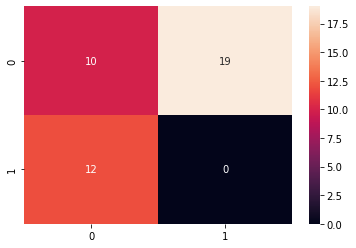

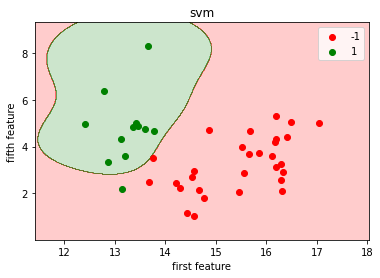

In [ ]:
#-------------------------------------------- SVM 3 ---------------------------------------------------
label_train_y=binarized_labels(y,3)
label_test_y=binarized_labels(y_test,3)
title='svm'
x_label="first feature"
y_label="fifth feature"
model_SVM_3= SVC(gamma='auto',probability=True)
model_SVM_3.fit(x,label_train_y)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_SVM: ",model_SVM_3.score(x_test, label_test_y)*100)
print('\nClassification Report_SVM:\n')
print(classification_report(label_test_y,y_pred))
print('Confusion Matrix_SVM:\n')
hm=sn.heatmap(confusion_matrix(label_test_y,y_pred), annot=True)
plt.show()
decision_boundary(model_SVM_3,x_test,label_test_y,title,x_label,y_label)

# argmax on SVM

predicted_true_svm= 38
svm_accuracy: 92.6829268292683


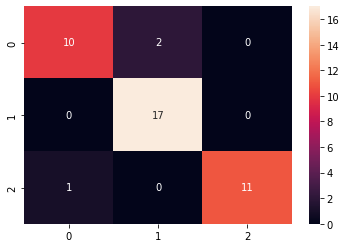

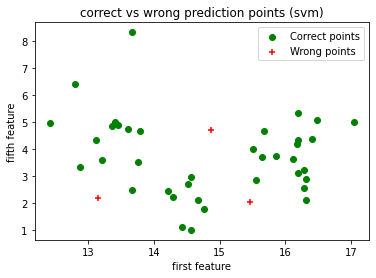

In [ ]:
title="correct vs wrong prediction points (svm)"
sv1 = model_SVM_1.predict_proba(x_test)[:,1]
sv2 = model_SVM_2.predict_proba(x_test)[:,1]
sv3 = model_SVM_3.predict_proba(x_test)[:,1]
sv_predicted= np.argmax([sv1,sv2,sv3],axis=0)
for i in range(len(y_test)):
    if sv_predicted[i]==0:
        sv_predicted[i]=1
    elif sv_predicted[i]==1:
        sv_predicted[i]=2
    else :
        sv_predicted[i]=3
svm_predicted_true=0
for i in range(len(y_test)):
    if y_test[i]==sv_predicted[i]:
        svm_predicted_true+=1
print("predicted_true_svm=",svm_predicted_true)
svm_acc=svm_predicted_true/len(y_test)
print("svm_accuracy:",svm_acc*100)
hm=sn.heatmap(confusion_matrix(y_test,sv_predicted), annot=True)
plt.show()
plot_point(x_test,sv_predicted,y_test,title)


# Voting Classifier on SVM

Accuracy for voting_SVM:  92.6829268292683
38


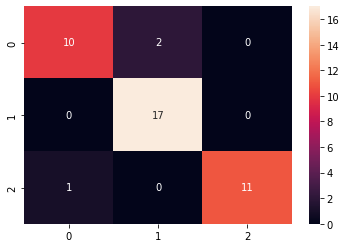

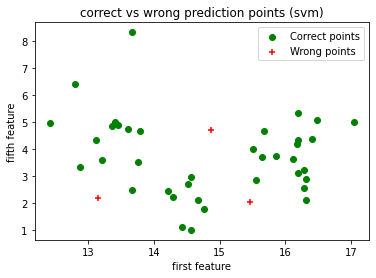

In [ ]:
vot_hard = VotingClassifier(estimators=[('c1', model_SVM_1), ('c2', model_SVM_2), ('c3', model_SVM_3)], voting='hard')
vot_hard.fit(x, y)
y_pred = vot_hard.predict(x_test)
print("Accuracy for voting_SVM: ",vot_hard.score(x_test, y_test)*100)
print(accuracy_score(y_test, y_pred, normalize=False))
hm=sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.show()
plot_point(x_test,y_pred,y_test,title)

0.926829268292683


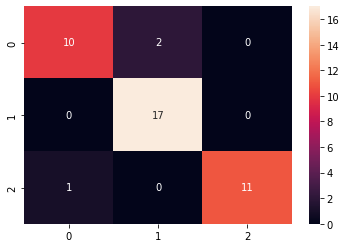

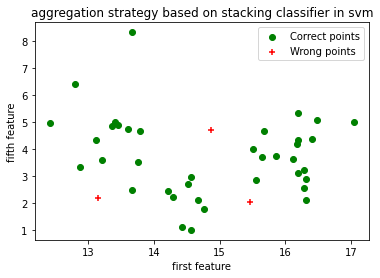

In [ ]:
title="aggregation strategy based on stacking classifier in svm"
from sklearn.ensemble import StackingClassifier
estimators = [
              ('svm1', model_SVM_1),
              ('svm2',model_SVM_2 ),('svm3',model_SVM_3)]
clf = StackingClassifier(estimators=estimators)
print(clf.fit(x, y).score(x_test, y_test))
predicted_model_point=clf.predict(x_test)
hm=sn.heatmap(confusion_matrix(y_test,predicted_model_point), annot=True)
plt.show()
plot_point(x_test,predicted_model_point,y_test,title)

Accuracy for model_Perceptron:  85.36585365853658

Classification Report_Perceptron:

              precision    recall  f1-score   support

          -1       0.87      0.93      0.90        29
           1       0.80      0.67      0.73        12

    accuracy                           0.85        41
   macro avg       0.84      0.80      0.81        41
weighted avg       0.85      0.85      0.85        41

Confusion Matrix_Perceptron:



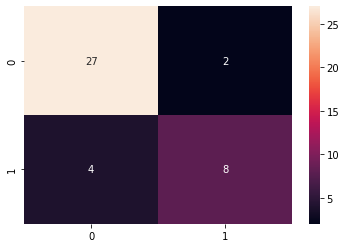

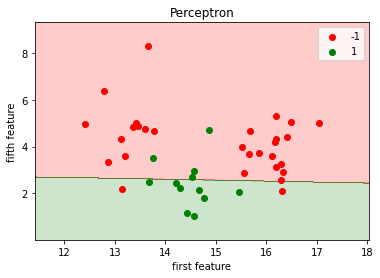

In [ ]:
#-------------------------------------------- Perceptron 1 ---------------------------------------------------
label_train_y=binarized_labels(y,1)
label_test_y=binarized_labels(y_test,1)
title='Perceptron'
x_label="first feature"
y_label="fifth feature"
model_Perceptron_1 = Perceptron(n_iter_no_change=80)
model_Perceptron_11 = CalibratedClassifierCV(model_Perceptron_1,method='sigmoid')
model_Perceptron_11.fit(x,label_train_y)
# Predicting the Test set results
y_pred=model_Perceptron_11.predict(x_test)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_Perceptron: ",model_Perceptron_11.score(x_test, label_test_y)*100)
print('\nClassification Report_Perceptron:\n')
print(classification_report(label_test_y,y_pred))
print('Confusion Matrix_Perceptron:\n')
hm=sn.heatmap(confusion_matrix(label_test_y,y_pred), annot=True)
plt.show()
decision_boundary(model_Perceptron_11,x_test,label_test_y,title,x_label,y_label)

Accuracy for model_Perceptron:  97.5609756097561

Classification Report_Perceptron:

              precision    recall  f1-score   support

          -1       1.00      0.96      0.98        24
           1       0.94      1.00      0.97        17

    accuracy                           0.98        41
   macro avg       0.97      0.98      0.98        41
weighted avg       0.98      0.98      0.98        41

Confusion Matrix_Perceptron:



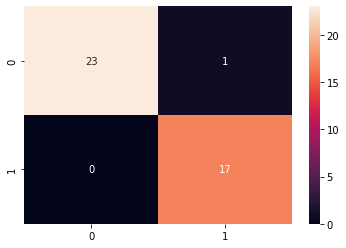

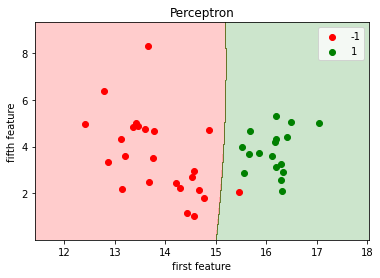

In [ ]:
#-------------------------------------------- Perceptron 2 ---------------------------------------------------
label_train_y=binarized_labels(y,2)
label_test_y=binarized_labels(y_test,2)
title='Perceptron'
x_label="first feature"
y_label="fifth feature"
model_Perceptron_2 = Perceptron(n_iter_no_change=80)
model_Perceptron_22 = CalibratedClassifierCV(model_Perceptron_1,method='sigmoid')
model_Perceptron_22.fit(x,label_train_y)
# Predicting the Test set results
y_pred=model_Perceptron_22.predict(x_test)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_Perceptron: ",model_Perceptron_22.score(x_test, label_test_y)*100)
print('\nClassification Report_Perceptron:\n')
print(classification_report(label_test_y,y_pred))
print('Confusion Matrix_Perceptron:\n')
hm=sn.heatmap(confusion_matrix(label_test_y,y_pred), annot=True)
plt.show()
decision_boundary(model_Perceptron_22,x_test,label_test_y,title,x_label,y_label)

Accuracy for model_Perceptron:  97.5609756097561

Classification Report_Perceptron:

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        29
           1       1.00      0.92      0.96        12

    accuracy                           0.98        41
   macro avg       0.98      0.96      0.97        41
weighted avg       0.98      0.98      0.98        41

Confusion Matrix_Perceptron:



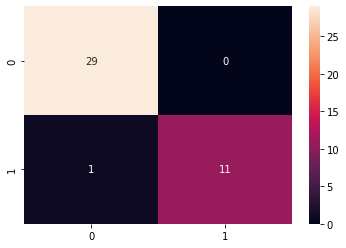

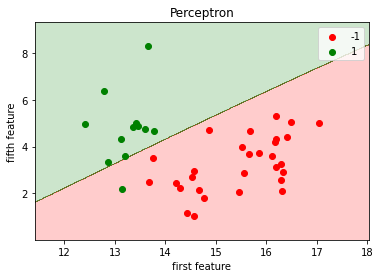

In [ ]:
#-------------------------------------------- Perceptron 3 ---------------------------------------------------
label_train_y=binarized_labels(y,3)
label_test_y=binarized_labels(y_test,3)
title='Perceptron'
x_label="first feature"
y_label="fifth feature"
model_Perceptron_3 = Perceptron(n_iter_no_change=80)
model_Perceptron_33 = CalibratedClassifierCV(model_Perceptron_1,method='sigmoid')
model_Perceptron_33.fit(x,label_train_y)
# Predicting the Test set results
y_pred=model_Perceptron_33.predict(x_test)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_Perceptron: ",model_Perceptron_33.score(x_test, label_test_y)*100)
print('\nClassification Report_Perceptron:\n')
print(classification_report(label_test_y,y_pred))
print('Confusion Matrix_Perceptron:\n')
hm=sn.heatmap(confusion_matrix(label_test_y,y_pred), annot=True)
plt.show()
decision_boundary(model_Perceptron_33,x_test,label_test_y,title,x_label,y_label)

# argmax on Perceptron

predicted_true_pre= 37
pre_accuracy: 90.2439024390244


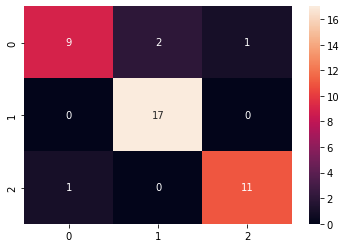

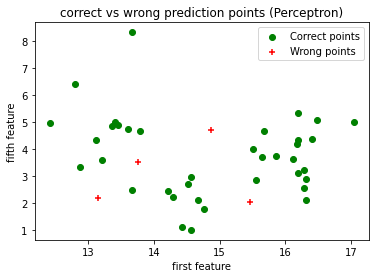

In [ ]:
title="correct vs wrong prediction points (Perceptron)"
pre1 = model_Perceptron_11.predict_proba(x_test)[:,1]
pre2 = model_Perceptron_22.predict_proba(x_test)[:,1]
pre3 = model_Perceptron_33.predict_proba(x_test)[:,1]
pre_predicted= np.argmax([pre1,pre2,pre3],axis=0)
for i in range(len(y_test)):
    if pre_predicted[i]==0:
        pre_predicted[i]=1
    elif pre_predicted[i]==1:
        pre_predicted[i]=2
    else :
        pre_predicted[i]=3
pre_predicted_true=0
for i in range(len(y_test)):
    if y_test[i]==pre_predicted[i]:
        pre_predicted_true+=1
print("predicted_true_pre=",pre_predicted_true)
pre_acc=pre_predicted_true/len(y_test)
print("pre_accuracy:",pre_acc*100)
hm=sn.heatmap(confusion_matrix(y_test,pre_predicted), annot=True)
plt.show()
plot_point(x_test,pre_predicted,y_test,title)



# Voting Classifier on Perceptron

Accuracy for voting_perceptron:  95.1219512195122
39


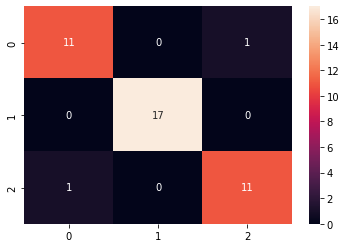

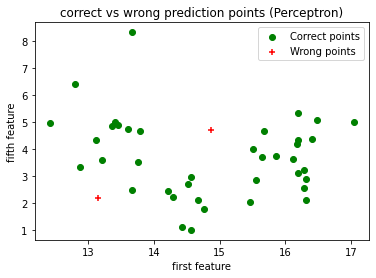

In [ ]:
title="correct vs wrong prediction points (Perceptron)"
vot_hard = VotingClassifier(estimators=[('c1', model_Perceptron_11), ('c2', model_Perceptron_22), ('c3', model_Perceptron_33)], voting='hard')
vot_hard.fit(x, y)
y_pred = vot_hard.predict(x_test)
print("Accuracy for voting_perceptron: ",vot_hard.score(x_test, y_test)*100)
print(accuracy_score(y_test, y_pred, normalize=False))
hm=sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.show()
plot_point(x_test,y_pred,y_test,title)

# Stacking classifier

0.9024390243902439


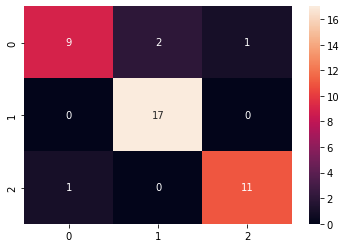

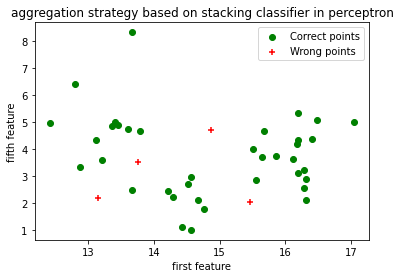

In [ ]:
title="aggregation strategy based on stacking classifier in perceptron"
from sklearn.ensemble import StackingClassifier
estimators__per = [
              ('Perceptron1', model_Perceptron_11),
              ('Perceptron2',model_Perceptron_22 ),('Perceptron3',model_Perceptron_33)]
clf__per = StackingClassifier(estimators=estimators__per)
print(clf__per.fit(x, y).score(x_test, y_test))
predicted__point=clf__per.predict(x_test)
hm=sn.heatmap(confusion_matrix(y_test,predicted__point), annot=True)
plt.show()
plot_point(x_test,predicted__point,y_test,title)